# Project - Kinematics of the Stewart Platform

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

# Table of Contents
1. Define the function
2. Function visualization
4. Solution of forward kinematics problem
5. Solutions with different parameters
6. References

## I. Define the function for the Stewart platform
1. Define the function for the position of the platform given specific parameters.
2. Test the function on $\frac{-\pi}{4}$ and $\frac{\pi}{4}$ to find approximate roots
3. Test the function on values from [-$\pi$,$\pi$]

1.1 Define the function:

This function takes in specific parameters for the positioning of the platform and does the necessary calculations to return x, y, $f(\theta)$

In [ ]:
def f(theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3):
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gamma) - x2
    B3 = L2*math.sin(theta+gamma) - y2
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)

    x = N1/D
    y = N2/D
    ftheta = N1**2 + N2**2 - p1**2 * D**2

    return x, y, ftheta

1.2 Test the function on values of $\frac{-\pi}{4}$ and $\frac{\pi}{4}$ for specific parameters:

In [ ]:
L1 = 2
L2 = math.sqrt(2)
L3 = math.sqrt(2)
gamma = math.pi / 2
x1 = 4
x2 = 0
y2 = 4
p1 = math.sqrt(5)
p2 = math.sqrt(5)
p3 = math.sqrt(5)

theta = (math.pi)/4
print('Theta = Pi/4; x, y, f(theta) = ', f(theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))
print('Theta = -Pi/4; x, y, f(theta) = ', f(-theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))

Theta = Pi/4; x, y, f(theta) =  (2.0, 1.0, -4.547473508864641e-13)
Theta = -Pi/4; x, y, f(theta) =  (1.0, 2.0, -4.547473508864641e-13)


$f(\theta$) when $\theta$ = $\frac{-\pi}{4}$ and $\frac{\pi}{4}$ is approximately zero, showing that the function has approximate roots at those points.

1.3 Test the function on values from an interval of [-$\pi$, $\pi$]:

We test the function for a specific interval, giving the results in a dataframe.

In [ ]:
vals = [-math.pi, -3*math.pi/4, -math.pi/2, -math.pi/4, math.pi/4, math.pi/2, 3*math.pi/4, math.pi]

sol = [[i] + list(f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)) for i in vals]
test = pd.DataFrame(sol, columns = ['$\theta$','x','y','$f(\theta)$'])
test

$\theta$         x         y   $f(\theta)$
0 -3.141593  2.707107  2.707107  3.319229e+04
1 -2.356194  2.000000  3.000000  2.163200e+04
2 -1.570796  1.292893  2.707107  5.184000e+03
3 -0.785398  1.000000  2.000000 -4.547474e-13
4  0.785398  2.000000  1.000000 -4.547474e-13
5  1.570796  2.707107  1.292893  5.184000e+03
6  2.356194  3.000000  2.000000  2.163200e+04
7  3.141593  2.707107  2.707107  3.319229e+04

## II. Function visualization
1. Plot the function on the interval [-$\pi$,$\pi$]
2. Plot figures of the two poses of the platform and struts for given parameters at each root

2.1 Plot the function on the interval [-$\pi$,$\pi$]

We get values for x (the input over an interval of [-$\pi$,$\pi$]) and y (corresponding values of the function), and then plot the figure and point out the approximate roots.

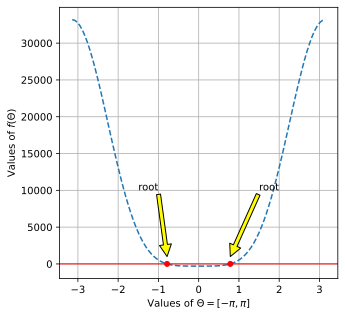

In [ ]:
%config InlineBackend.figure_format = 'svg'

xval = np.linspace(-math.pi, math.pi, 100)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

plt.figure(figsize=(5,5))
plt.grid()
plt.annotate('root', xytext=(-1.5,10000), xy=(-math.pi/4,1000), arrowprops={'facecolor': 'yellow'})
plt.annotate('root', xytext=(1.5,10000), xy=(math.pi/4,1000), arrowprops={'facecolor': 'yellow'})
plt.plot(xval, yval, '--')
plt.axhline(0, color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.plot(math.pi/4,0, 'o', markersize=5, color = 'red')
plt.plot(-math.pi/4,0, 'o', markersize=5, color = 'red')
plt.show()


2.2 Plot two figures of different positions of the platform and struts for given parameters
1. Define a function to plot this figure
2. Plot first version of the figure with $\theta = \frac{-\pi}{4}$
3. Plot second version of the figure with $\theta = \frac{\pi}{4}$


2.2.1 Define function for plotting the platform

This function finds each point on the graph and connects the struts and platform. It highlights the platform in a red color and each strut anchor point with a blue circle.

In [ ]:
def plot_platform(theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3):

    x, y, ft = f(theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

    u1 = x
    v1 = y
    u2 = x + L3*math.cos(theta)
    v2 = y + L3*math.sin(theta)
    u3 = x + L2*math.cos(theta+gamma)
    v3 = y + L2*math.sin(theta+gamma)

    plt.plot([u1,u2,u3,u1],[v1,v2,v3,v1], color='red', lw=4)
    plt.plot([0,u1],[0,v1])
    plt.plot([x1,u2],[0,v2])
    plt.plot([x2,u3],[y2,v3])

    plt.plot(0, 0, 'o', markersize=5, color = 'blue')
    plt.plot(x1, 0, 'o', markersize=5, color = 'blue')
    plt.plot(x2, y2, 'o', markersize=5, color = 'blue')
    plt.plot(x, y, 'o', markersize=5, color = 'blue')
    plt.plot(u2, v2, 'o', markersize=5, color = 'blue')
    plt.plot(u3, v3, 'o', markersize=5, color = 'blue')
    plt.title('$\Theta$ = ' + str(theta))
    plt.show()

    return

2.2.2 Plotting the figure for given parameters and the first root, $\theta$ = $\frac{-\pi}{4}$

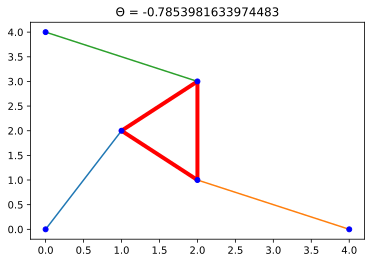

In [ ]:
plot_platform(-math.pi/4, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

2.2.3 Plotting the figure for given parameters and the second root, $\theta$ = $\frac{\pi}{4}$

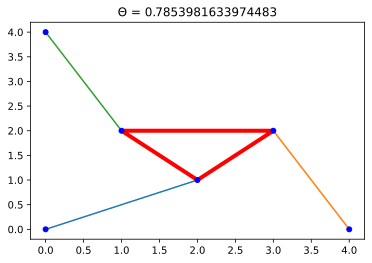

In [ ]:
plot_platform(math.pi/4, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

## III. Solution of foward kinematics problem for Stewart platform
1. Plot $f(\theta)$ for given parameters
2. Define equation solvers for the problem
3. Use equation solvers to solve the problem and plot the poses
4. Verify the results
Given parameters:
$x_1 = 5, (x_2,y_2) = (0,6), L_1 = 3, L_2 = 3\sqrt{2}, L_3 = 3, \gamma = \frac{\pi}{4}, p_1 = 5, p_2 = 5, p_3 = 3$


3.1 Plot $f(\theta)$ for given parameters

We redefine our parameters with new constants and plot this new function. By doing this we find the intervals for each root.

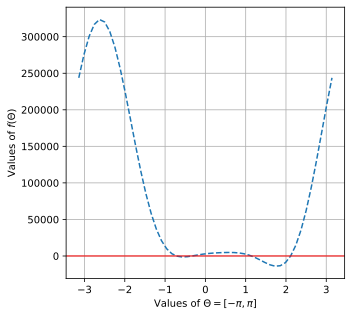

In [ ]:
x1 = 5
x2 = 0
y2 = 6
L1 = 3
L2 = 3*math.sqrt(2)
L3 = 3
gamma = math.pi/4
p1 = 5
p2 = 5
p3 = 3

xval = np.linspace(-math.pi, math.pi, 50)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.show()

To see the roots clearly, let's limit the values on the y-axis:

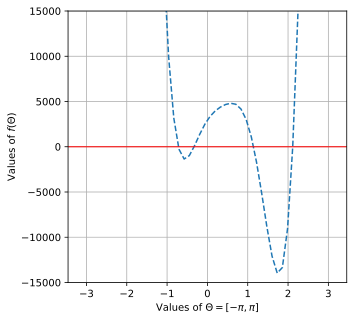

In [ ]:
xval = np.linspace(-math.pi, math.pi, 50)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.ylim(-1.5 * 10**4,1.5 * 10**4)
plt.show()

It is easy to see that the four roots $r_1, r_2, r_3, r_4$ lie in the following intervals:
$$r_1 \in (-1,-0.5) $$ $$r_2 \in (-0.5,0.0)$$ $$r_3 \in (1,1.25)$$ $$r_4 \in (2,2.25)$$

Here, we should not use Fixed-Point iteration method because we will have multiple equations in the form of $\theta = g(\theta)$ to solve for $\theta$ iteratively, and these multiple forms will include $sin^{-1}(\theta)$ and $cos^{-1}(\theta)$. Even after finding these different forms of equations, we are required to check if $f^{\prime}(\theta)$ is $<1$ in the close neighbourhood of actual root. The condition $|f^{\prime}(x)| < 1$ for all of the four intervals is not satisfied here. By visual inspection, we can say that slope of $f(x)$ in all four intervals containing the root is greater than 1.

So, we are left with the Bisection method, which we know will work well in this situation because apriori we know all intervals bracketing the roots. We can also attempt to use the Newton-Raphson method for this problem, which may run faster. We just need to run each method four times to find these four roots.

3.2 Define the equation solvers we will use in this problem

3.2.1 First, the Bisection method:

In [ ]:
def bisection(a,b,tol):
    c = a

    n = 0
    while (abs(b-a) >= tol):
        n=n+1
        c = (a+b)/2
        prod = f(c,L1,L2,L3,gamma,x1,x2,y2,p1,p2,p3)[2]*f(a,L1,L2,L3,gamma,x1,x2,y2,p1,p2,p3)[2]

        if prod < 0:
            b = c
        elif prod > 0:
            a = c

    return c, n


3.2.2 Second, we define the Newton method:

In [ ]:
def newton(a0, TOL = 1e-8, limit = 1000):
    n = 0
    k = 1e-7
    while n <= limit:
        n=n+1
        derivative = (f(a0+k,L1,L2,L3,gamma,x1,x2,y2,p1,p2,p3)[2]-f(a0-k,L1,L2,L3,gamma,x1,x2,y2,p1,p2,p3)[2])/(2*k)
        a1 = a0 - f(a0,L1,L2,L3,gamma,x1,x2,y2,p1,p2,p3)[2] / derivative

        if (abs(a1 - a0) < TOL):
            return a1, n

        a0 = a1


    if n == limit:
        return None, n

3.3 Use the equation solvers to solve the problem and plot the poses

3.3.1 First we use each equation solver to solve the problem and find the roots

We will time each solver and look at how many iterations occured to test the efficiency and compare them.

For bisection method, we initialize the solver using the approximate intervals surrounding the roots, and for newton method we initialize the solver using an approximate value for each root. Both of these we find using the plot of the function above.

In [ ]:
start1 = timeit.timeit()
theta1 = bisection(-1,-0.5,1e-8)
theta2 = bisection(-0.5,0,1e-8)
theta3 = bisection(1,1.25,1e-8)
theta4 = bisection(2,2.25,1e-8)
dt1 = timeit.timeit() - start1

# df = pd.DataFrame([theta1[0],theta2[0],theta3[0],theta4[0],dt1],columns=['Bisection'])
df = pd.DataFrame([theta1,theta2,theta3,theta4,(dt1,0)],columns=['Bisection','Bisection Iterations'])
df.index = ['r1','r2','r3','r4','time']
print(" Bisection method gives roots at x = ", theta1, theta2, theta3, theta4)

 Bisection method gives roots at x =  (-0.7208492085337639, 26) (-0.33100517839193344, 26) (1.1436855122447014, 25) (2.115909017622471, 25)


In [ ]:
start2 = timeit.timeit()
theta1_n = newton(-0.8)
theta2_n = newton(-0.4)
theta3_n = newton(1.2)
theta4_n = newton(2.1)
dt2 = timeit.timeit() - start2

df['Newton'] = [theta1_n[0],theta2_n[0],theta3_n[0],theta4_n[0],dt2]
df['Newton Iterations'] = [theta1_n[1],theta2_n[1],theta3_n[1],theta4_n[1],0]
print(" Newton method gives roots at x = ", theta1_n, theta2_n, theta3_n, theta4_n)

 Newton method gives roots at x =  (-0.7208492044603892, 5) (-0.3310051842838693, 4) (1.1436855178213736, 4) (2.1159090140864585, 4)


In [ ]:
df

Bisection  Bisection Iterations    Newton  Newton Iterations
r1    -0.720849                    26 -0.720849                  5
r2    -0.331005                    26 -0.331005                  4
r3     1.143686                    25  1.143686                  4
r4     2.115909                    25  2.115909                  4
time   0.002791                     0  0.000892                  0

Comparing the methods in the dataframe shows us that both method gives us the correct roots. While the Newton method was slightly faster, both methods in this case gave results farily quickly. However, the Newton method took significantly less iterations to find the roots than the Bisection method, so we will continue using the Newton method.

Hence the four roots are:
$$r_1 = -0.7208492085337639$$
$$r_2 = -0.33100519329309464$$
$$r_3 = 1.1436855122447014$$
$$r_4 = 2.115909017622471$$

In [ ]:
vals = [theta1_n[0],theta2_n[0],theta3_n[0],theta4_n[0]]
sol = [[i] + list(f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)) for i in vals]
df = pd.DataFrame(sol, columns = ['$\theta$','x','y','$f(\theta)$'])
df

$\theta$         x         y   $f(\theta)$
0 -0.720849 -1.378380  4.806253 -1.455192e-11
1 -0.331005 -0.914709  4.915619  0.000000e+00
2  1.143686  4.481750  2.216736  0.000000e+00
3  2.115909  4.571830  2.024443  0.000000e+00

This dataframe shows us the values of the function used for the four poses of the platform from each root of the function. We also confirm that each value is indeed a root because $f(\theta)=0$.

Now to show all four roots on the plot:

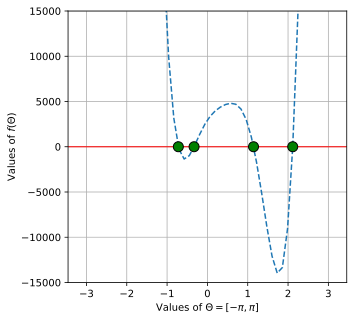

In [ ]:
xval = np.linspace(-math.pi, math.pi, 50)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.ylim(-1.5 * 10**4,1.5 * 10**4)
plt.plot(-0.7208, 0, 'o', markersize=10, markerfacecolor = 'green', markeredgecolor='black')
plt.plot(-0.3310, 0, 'o', markersize=10, markerfacecolor = 'green', markeredgecolor='black')
plt.plot(1.1436, 0, 'o', markersize=10, markerfacecolor = 'green', markeredgecolor='black')
plt.plot(2.11590, 0, 'o', markersize=10, markerfacecolor = 'green', markeredgecolor='black')
plt.show()

3.3.2 Plot all four poses from each root found

We plot the poses of the platform for each root using the plot_platform function defined earlier.


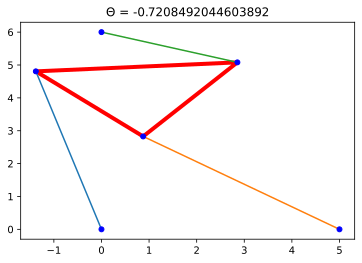

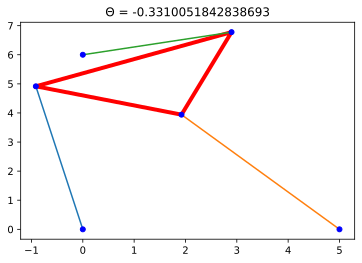

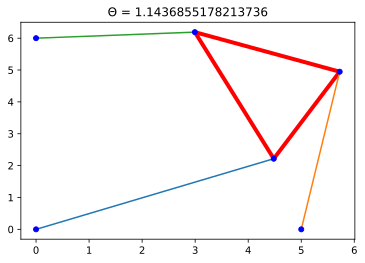

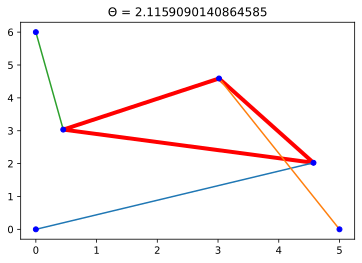

In [ ]:
plot_platform(theta1_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta2_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta3_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta4_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

3.4 Verifying our results

Now we will verify our results by calculating the strut lengths from the plots and comparing them to the strut length values we put in.

First we define a function to calculate the strut lengths from the plot using the distance formula from each struct anchor point:

In [ ]:
def strut_length(theta, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3):
    A2 = L3*math.cos(theta) - x1
    B2 = L3*math.sin(theta)
    A3 = L2*math.cos(theta+gamma) - x2
    B3 = L2*math.sin(theta+gamma) - y2
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    x = N1/D
    y = N2/D

    s1 = math.sqrt(x**2 + y**2)
    s2 = math.sqrt((x + A2)**2 + (y + B2)**2)
    s3 = math.sqrt((x + A3)**2 + (y + B3)**2)
    return s1, s2, s3

Finding the strut lengths in each pose:

In [ ]:
print(strut_length(theta1_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))
print(strut_length(theta2_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))
print(strut_length(theta3_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))
print(strut_length(theta4_n[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))

(5.0, 4.999999999999999, 3.0000000000000004)
(5.0, 5.0, 3.0000000000000004)
(5.0, 5.0, 3.0)
(5.0, 5.0, 3.0000000000000013)


$$P_1 \approx 5$$
$$P_2 \approx 5$$
$$P_3 \approx 3$$

We see that for all four poses, the calculated strut lengths from the plot match the strut lengths $p_1, p_2, p_3$ given, which verifies our results.

## IV. Solutions with different parameters

In this section we change one parameter and resolve the problem with new results.

1. We change the strut length $p_2$ = 7 and resolve the problem
2. We find a strut length in $p_2$ for which there are exactly 2 poses of the platform
3. We find the intervals of strut length in $p_2$ for which there are exactly 0, 2, 4, and 6 possible poses of the platform

4.1 First we reassign the constants so that $p_2 = 7$

We repeat the steps done above, plotting the function and zooming in to see the roots clearly.

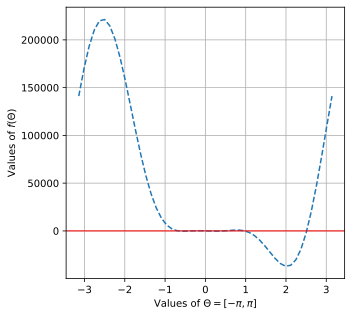

In [ ]:
p2 = 7

xval = np.linspace(-math.pi, math.pi, 50)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.show()

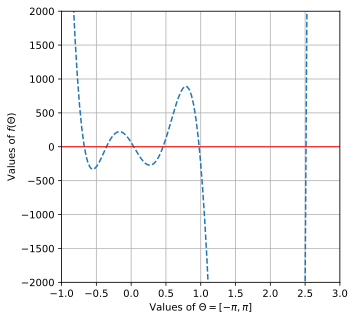

In [ ]:
xval = np.linspace(-math.pi, math.pi, 200)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.ylim(-2 * 10**3,2 * 10**3)
plt.xlim(-1,3)
plt.show()

When we change the second strut length to 7, we now have 6 roots. The six roots $r_1, r_2, r_3, r_4, r_5, r_6$ lie in the following intervals:
$$r_1 \in (-1,-0.5) $$ $$r_2 \in (-0.5,-0.25)$$ $$r_3 \in (-0.25,0.25)$$ $$r_4 \in (0.25,0.75)$$ $$r_5 \in (0.75,1)$$  $$r_6 \in (2.25,2.75)$$

We now use the Newton method to find the roots:

In [ ]:
theta1 = newton(-0.8)
theta2 = newton(-0.4)
theta3 = newton(0)
theta4 = newton(0.5)
theta5 = newton(1)
theta6 = newton(2.5)

df2 = pd.DataFrame([theta1,theta2,theta3,theta4,theta5,theta6], columns=['Newton','Iterations'])
print(" Newton method gives roots at x = ", theta1, theta2, theta3, theta4, theta5, theta6)

 Newton method gives roots at x =  (-0.6731574863716775, 6) (-0.3547402704156728, 4) (0.03776676057591275, 4) (0.4588781810489894, 4) (0.9776728950003627, 4) (2.513852799350384, 4)


In [ ]:
df2

Newton  Iterations
0 -0.673157           6
1 -0.354740           4
2  0.037767           4
3  0.458878           4
4  0.977673           4
5  2.513853           4

Hence the six roots are:
$$r_1 = -0.673157$$
$$r_2 = -0.354740$$
$$r_3 = 0.037767$$
$$r_4 = 0.458878$$
$$r_5 = 0.977673$$
$$r_6 = 2.513853$$

We can now plot each pose for all 6 roots:

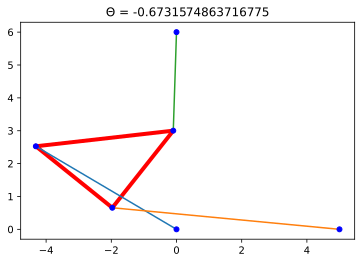

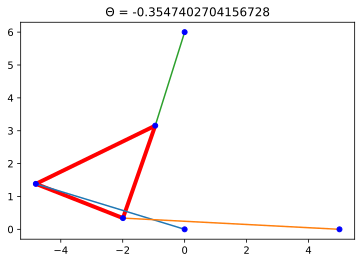

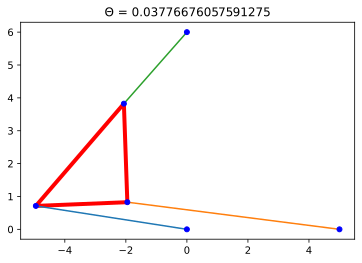

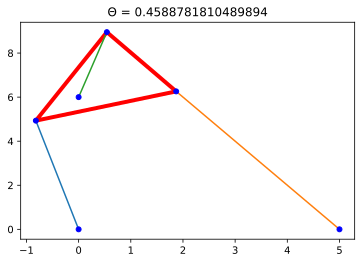

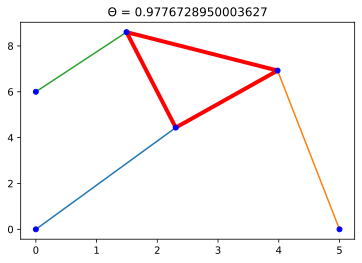

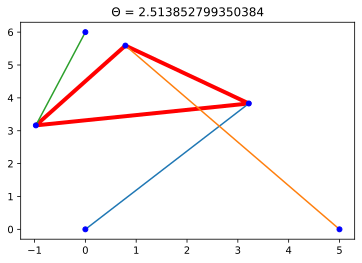

In [ ]:
plot_platform(theta1[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta2[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta3[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta4[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta5[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta6[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

We have now looked at one case where the platform has 4 poses, and one where the platform has 6 poses. We now want to find in general the strut lengths that give us 0, 2, 4, and 6 possible poses of the platform.

4.2 We now want to find a value in $p_2$ for which there are exactly 2 poses of the platform.

First, we loop through values for $p_2$ and plot each function to find the instances where we have exactly 2 roots:

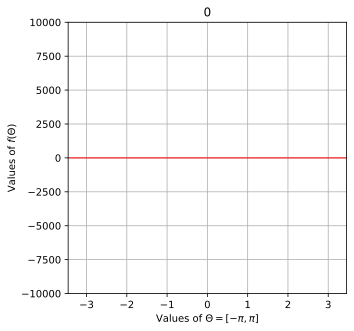

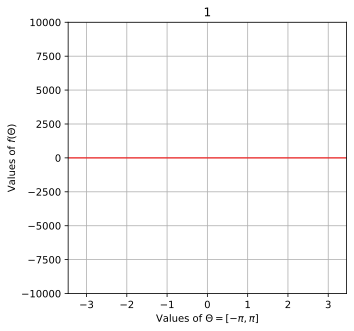

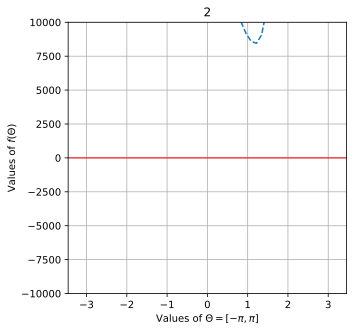

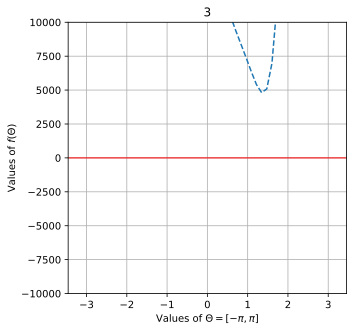

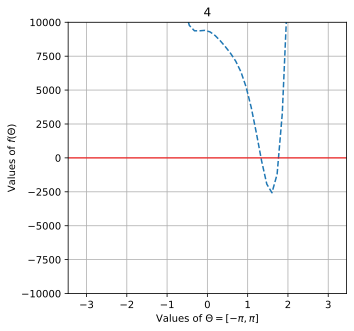

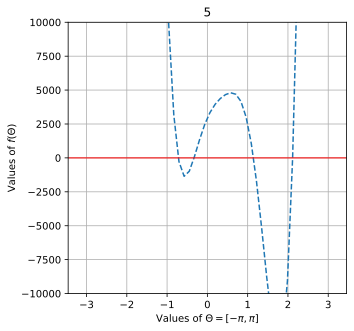

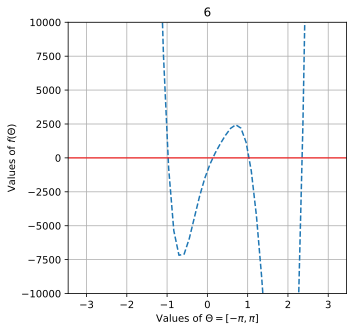

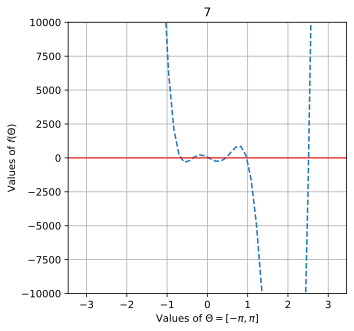

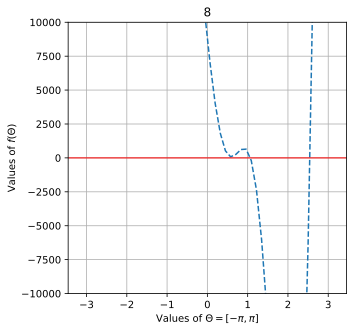

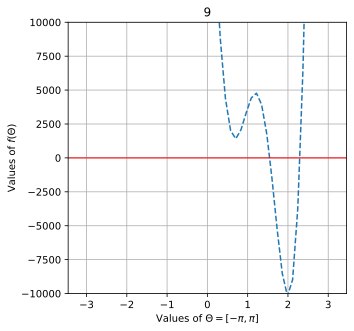

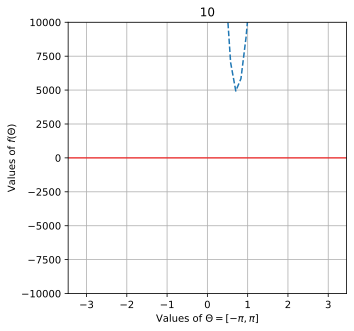

In [ ]:
k=0
while (k <= 10):
    p2 = k

    xval = np.linspace(-math.pi, math.pi, 50)
    yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

    plt.figure(figsize=(5,5))
    plt.grid()
    plt.plot(xval, yval, '--')
    plt.axhline(0,color='red', lw=1)
    plt.title(k)
    plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
    plt.ylabel('Values of $f(\Theta)$')
    plt.ylim(-1 * 10**4,1 * 10**4)
    plt.show()
    k+=1

For $p_2 = 4,8,9$ we get exactly two roots, and therefore exactly two poses. For all other values of $p_2$ we get either no roots or a different number of roots.

Now let's see the poses for one of the values, $p_2=4$, using the same process as before in 4.1:

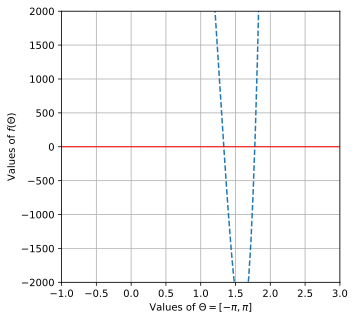

In [ ]:
p2 = 4

xval = np.linspace(-math.pi, math.pi, 200)
yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(xval, yval, '--')
plt.axhline(0,color='red', lw=1)
plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
plt.ylabel('Values of $f(\Theta)$')
plt.ylim(-2 * 10**3,2 * 10**3)
plt.xlim(-1,3)
plt.show()

In [ ]:
theta1 = newton(1.35)
theta2 = newton(1.8)

print(" Newton method gives roots at x = ", theta1, theta2)

 Newton method gives roots at x =  (1.3316422033427846, 4) (1.7775135743998542, 4)


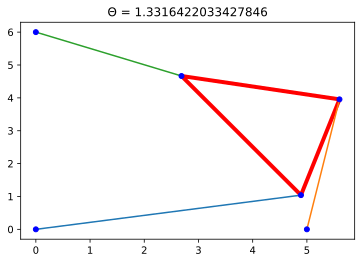

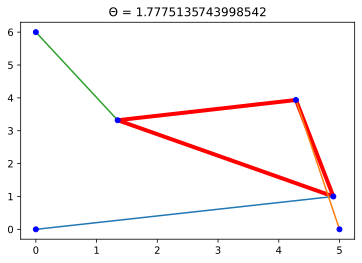

In [ ]:
plot_platform(theta1[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)
plot_platform(theta2[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)

In [ ]:
print(strut_length(theta1[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))
print(strut_length(theta2[0], L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3))

(4.999999999999999, 3.999999999999999, 2.9999999999999987)
(5.0, 4.0, 2.9999999999999996)


4.3 We find the intervals of strut length in $p_2$ for which there are 0, 2, 4, and 6 possible poses of the platform

We do this by looping through values for $p_2$ as before and collecting the intervals for each number of roots:

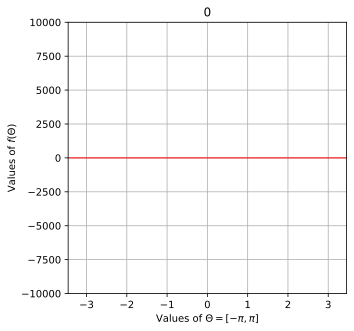

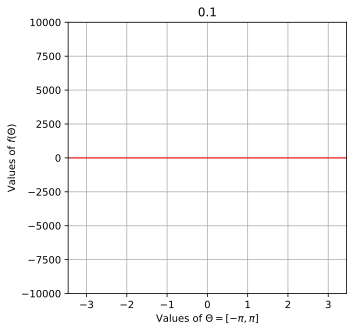

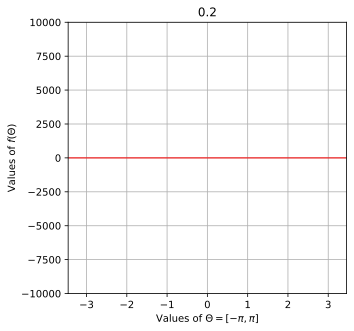

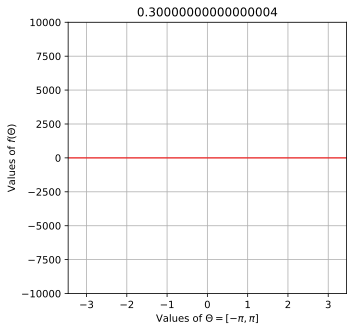

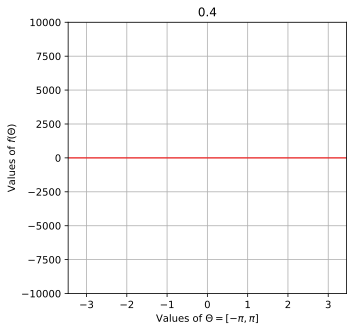

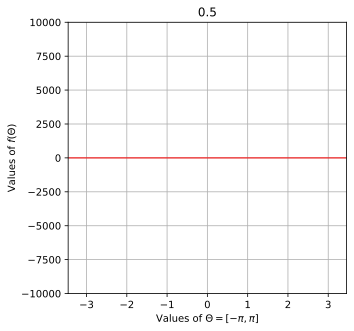

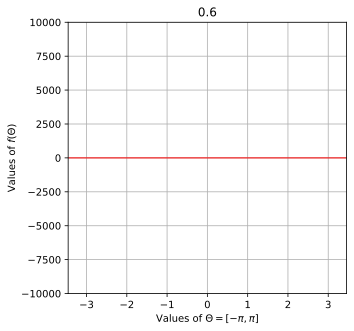

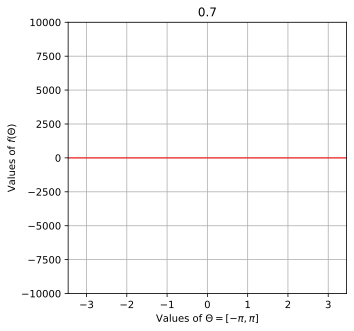

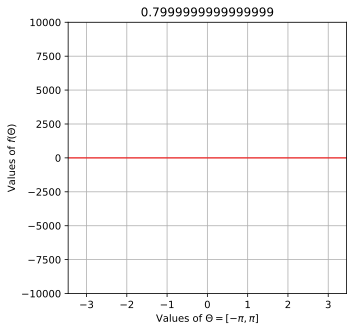

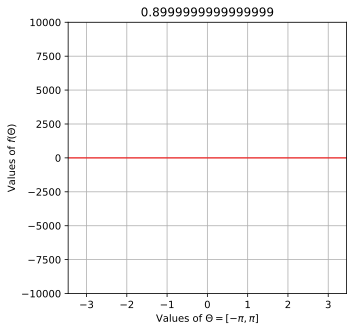

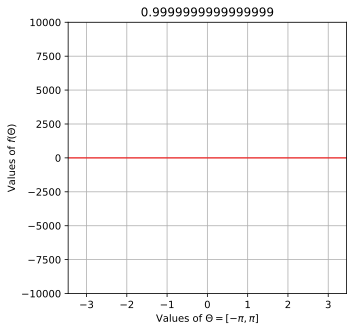

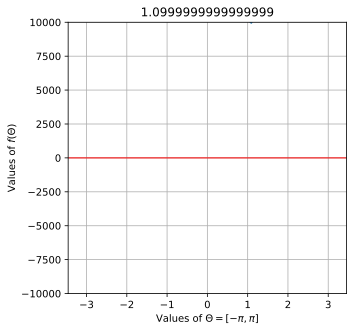

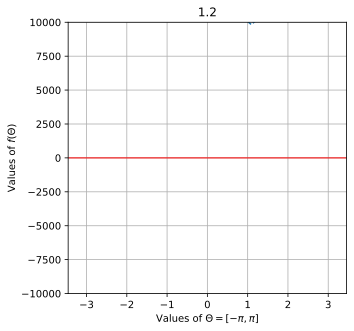

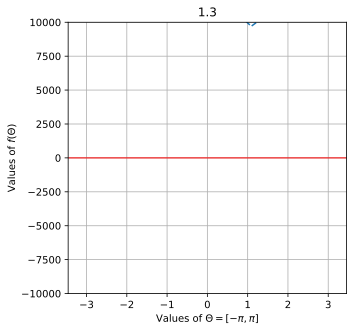

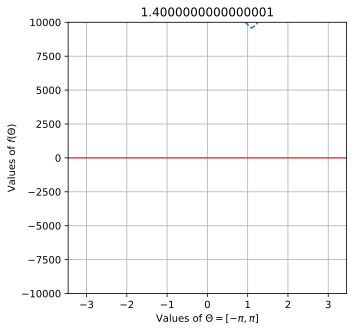

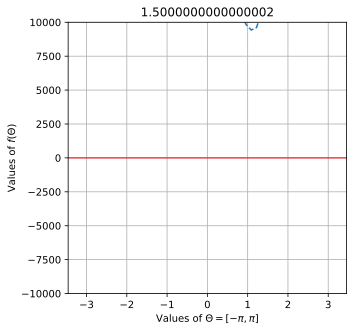

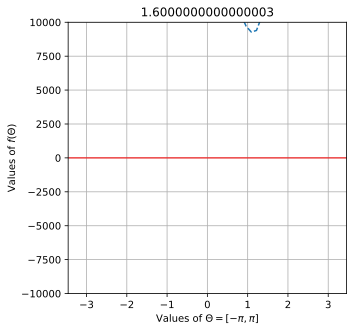

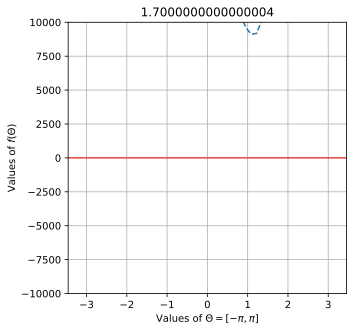

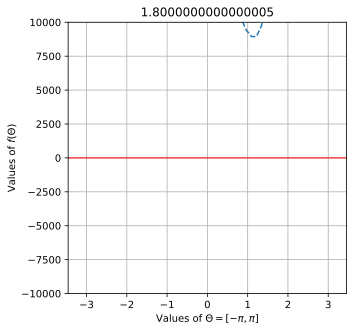

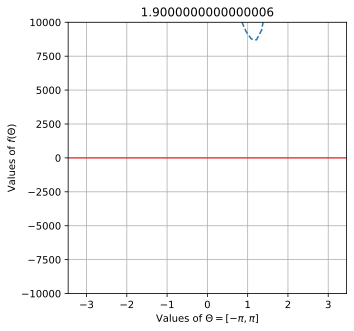

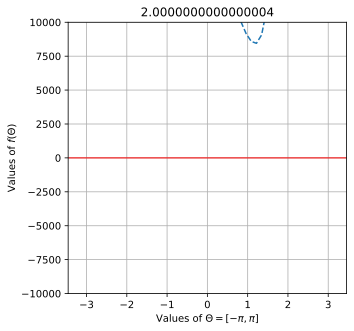

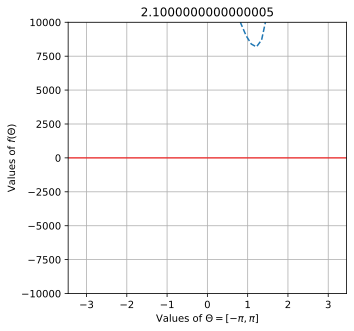

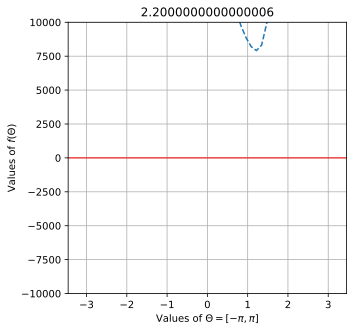

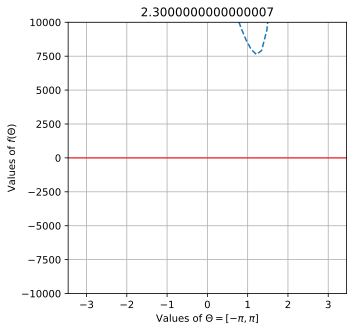

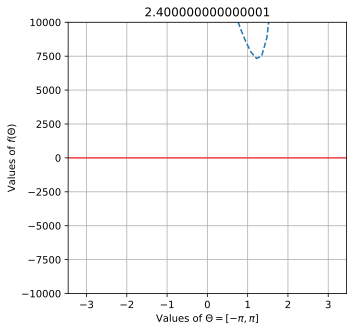

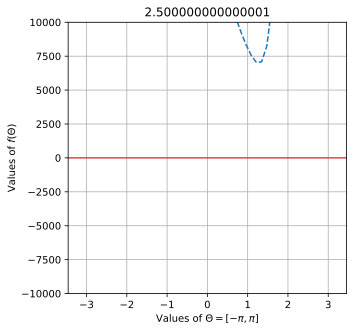

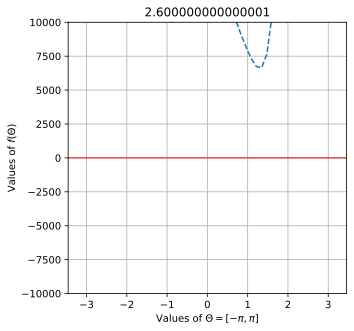

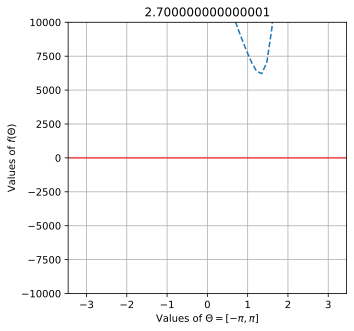

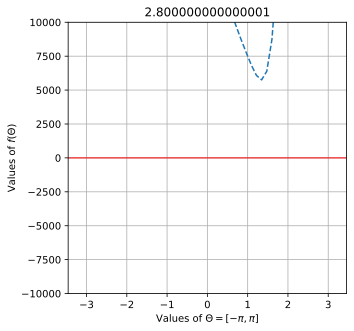

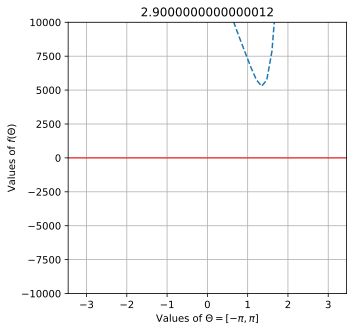

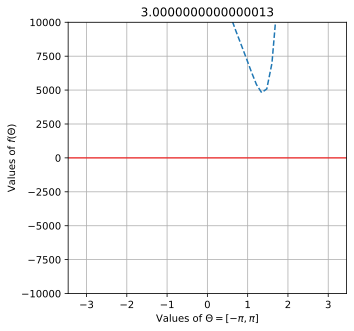

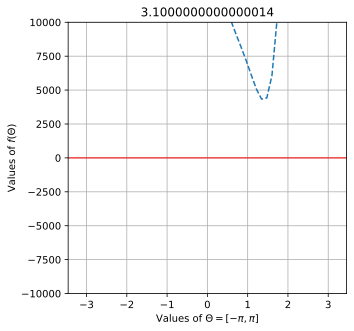

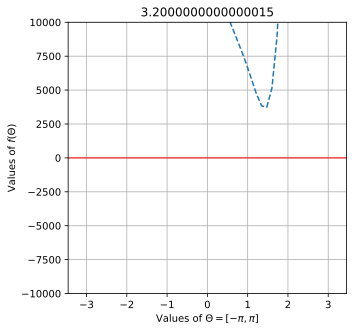

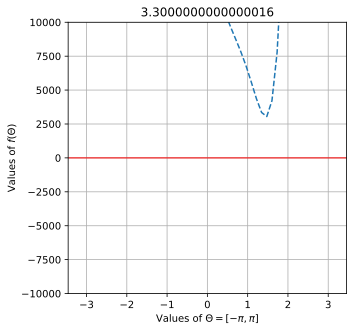

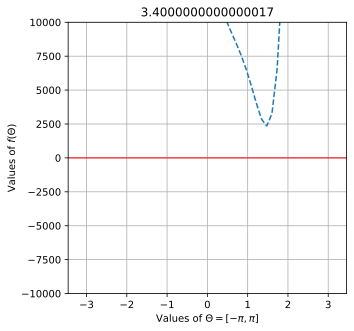

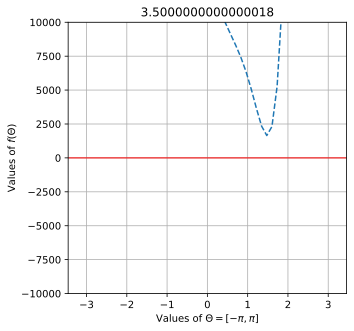

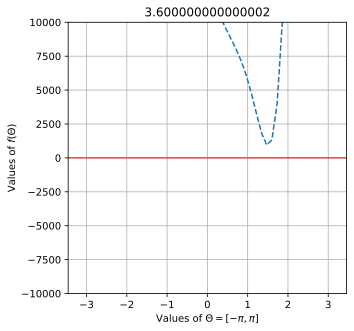

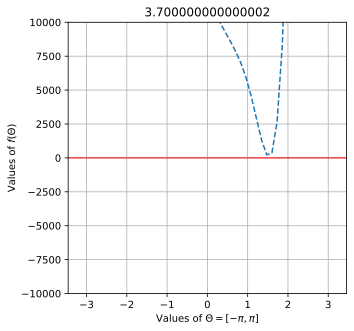

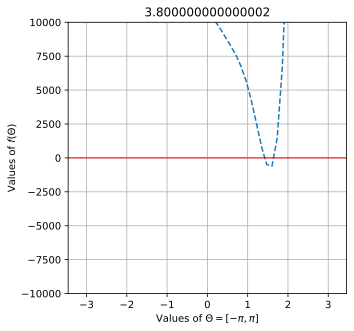

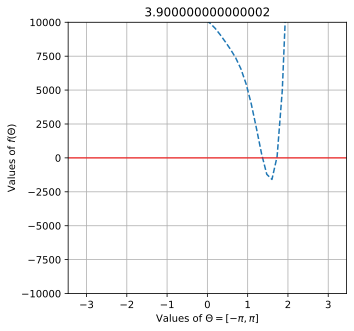

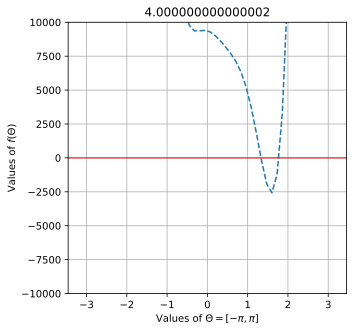

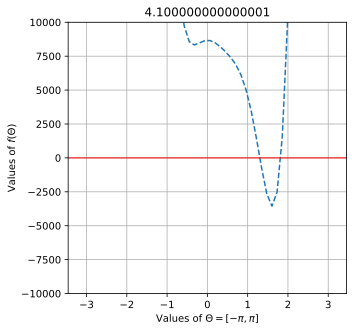

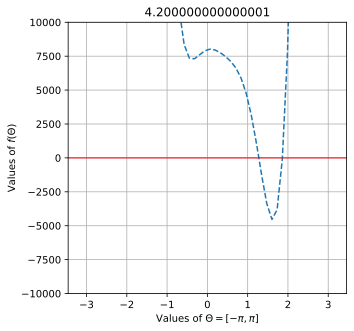

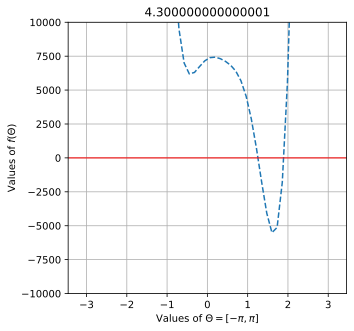

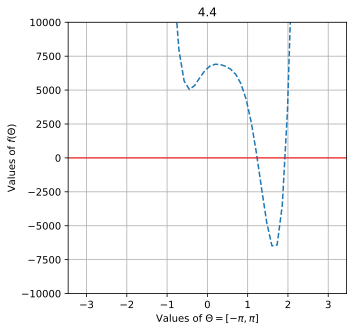

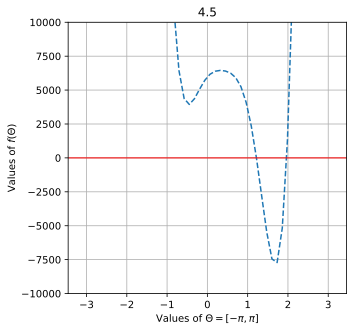

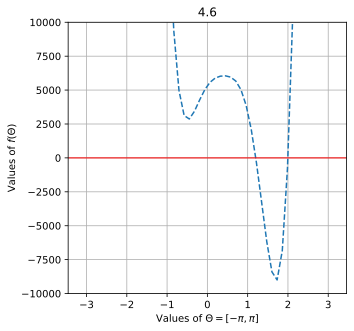

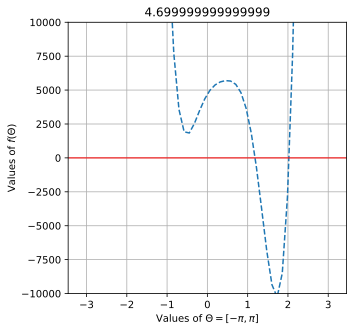

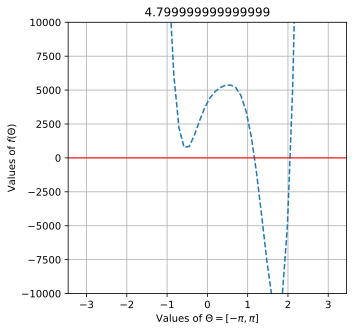

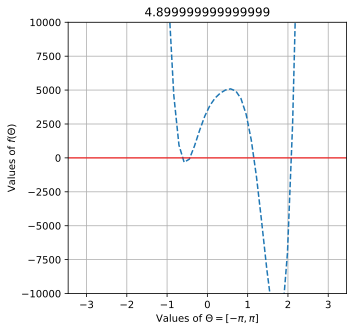

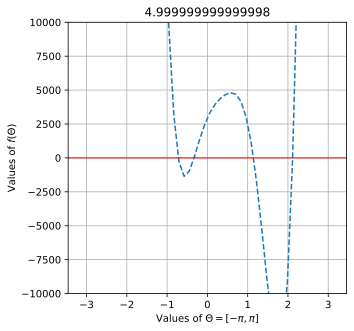

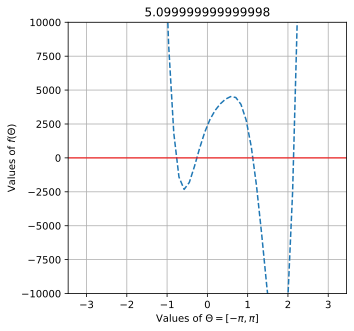

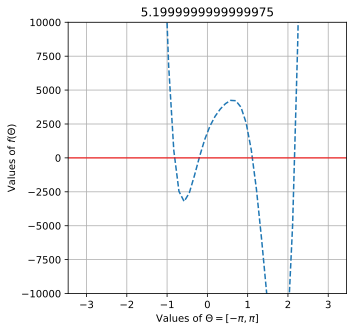

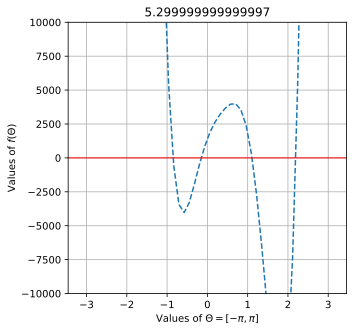

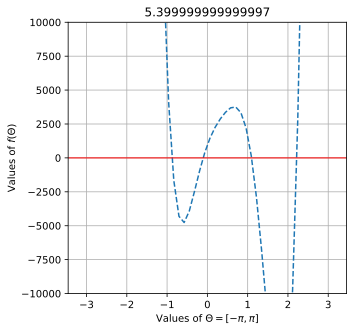

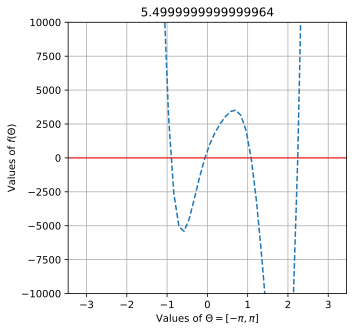

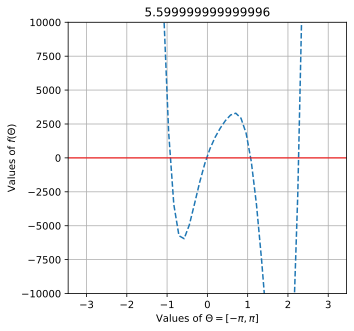

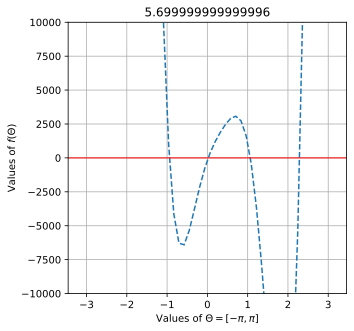

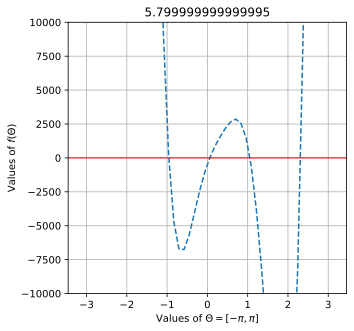

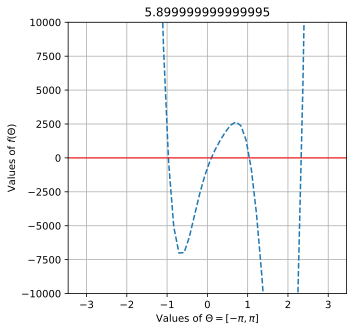

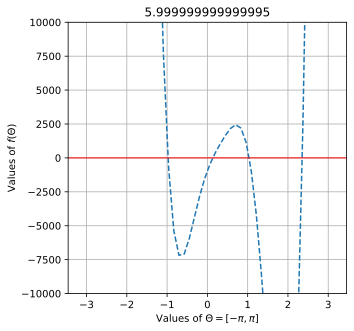

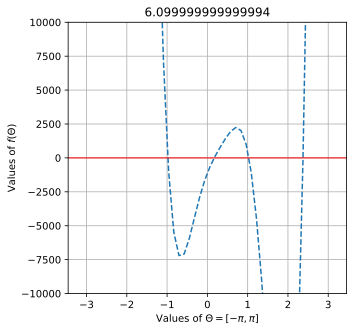

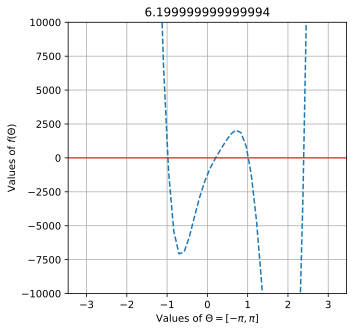

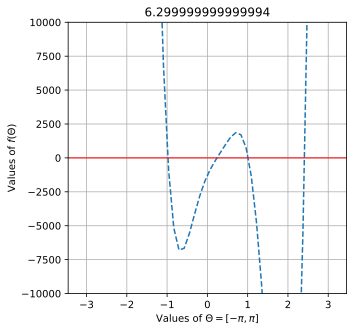

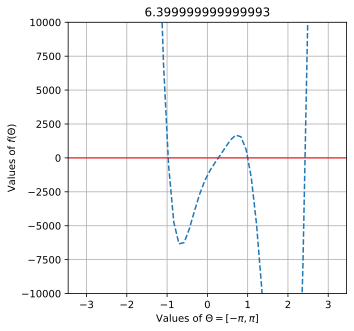

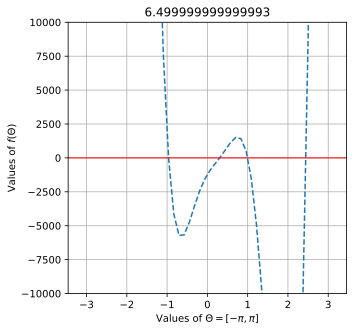

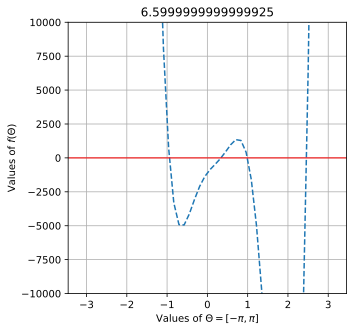

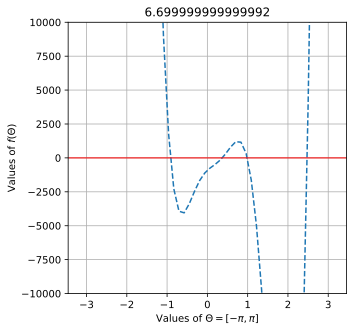

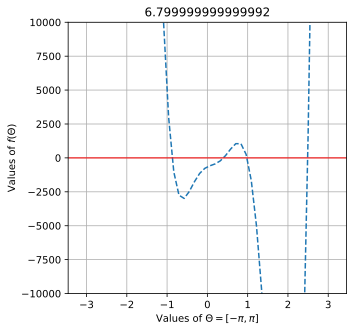

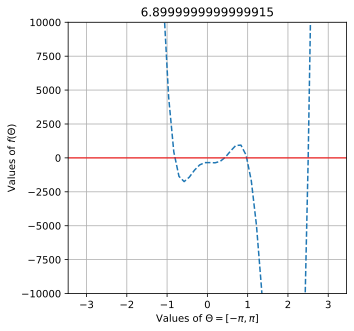

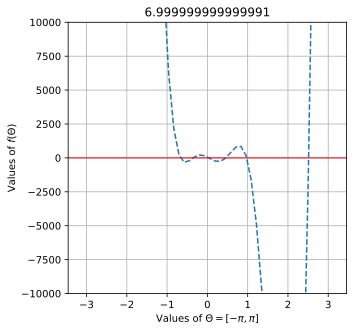

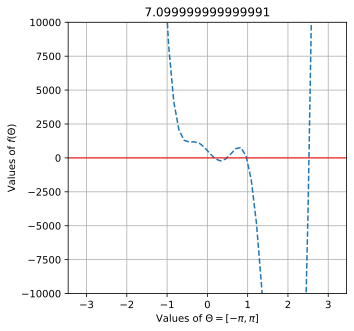

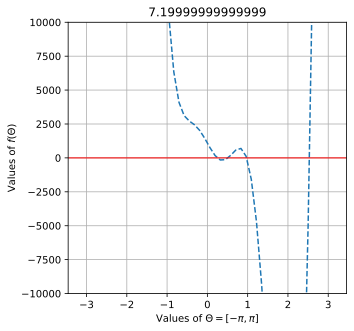

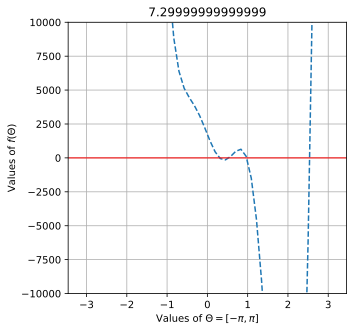

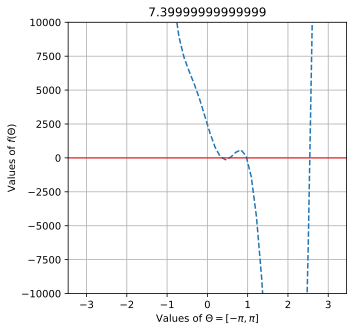

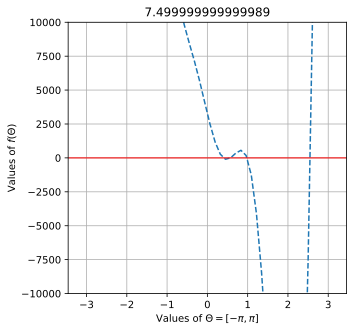

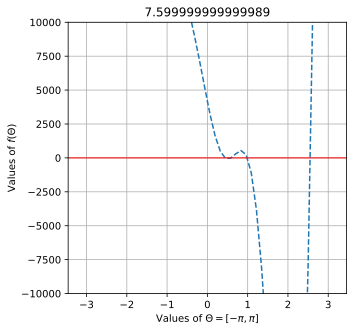

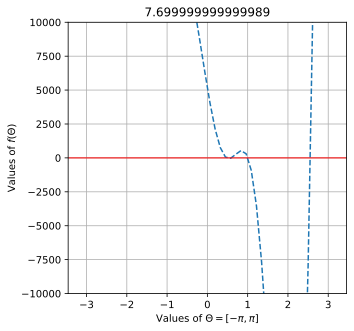

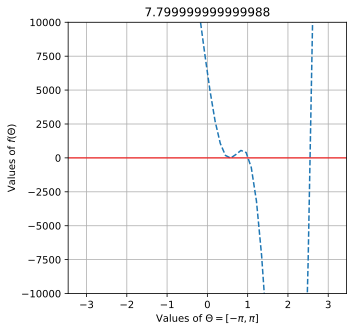

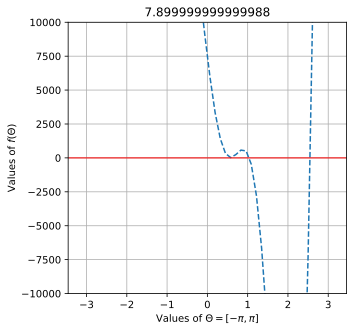

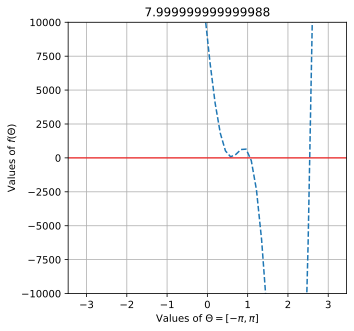

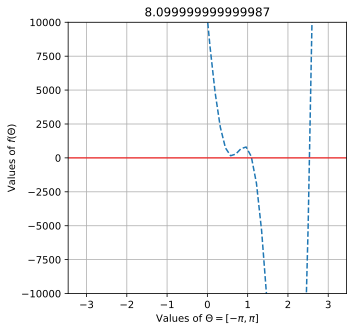

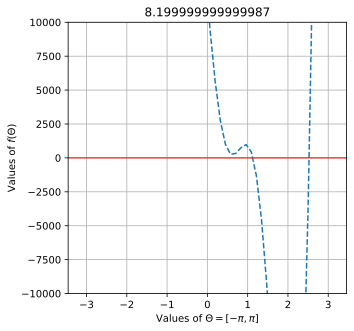

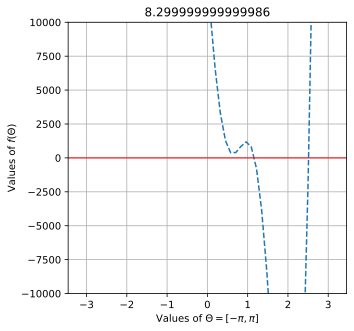

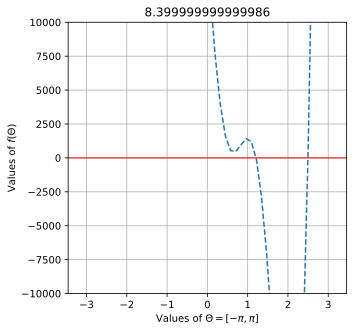

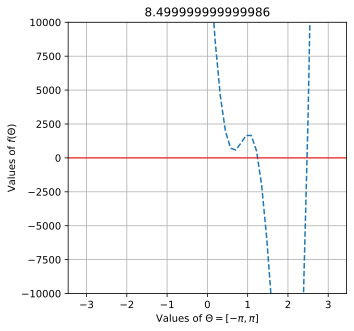

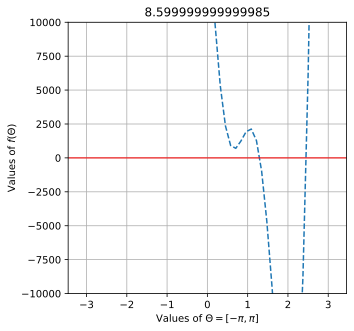

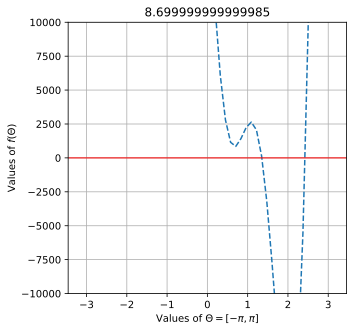

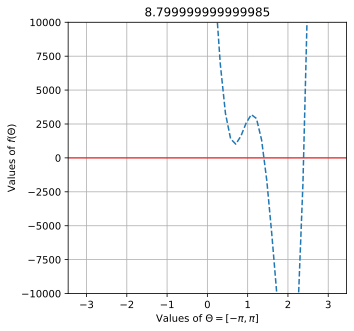

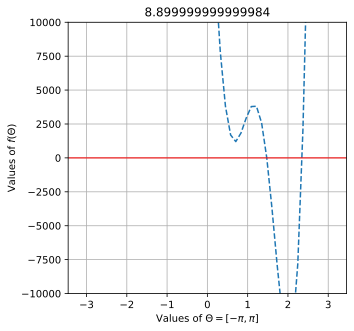

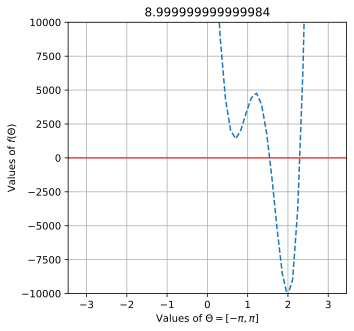

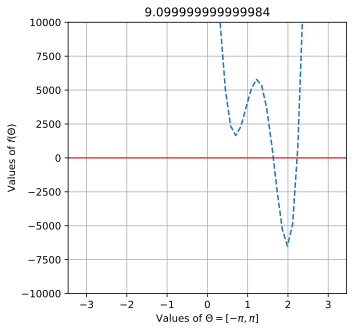

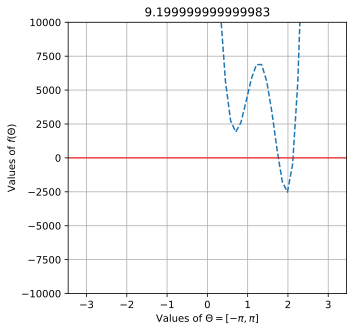

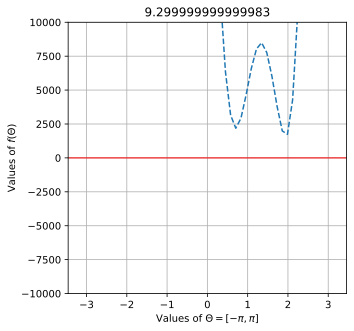

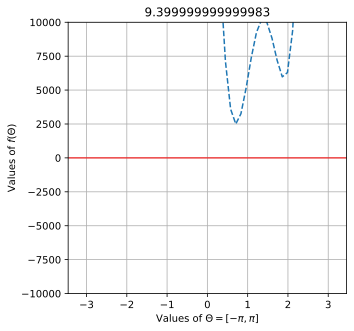

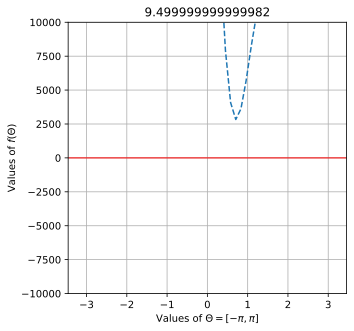

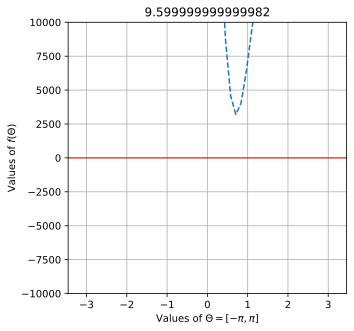

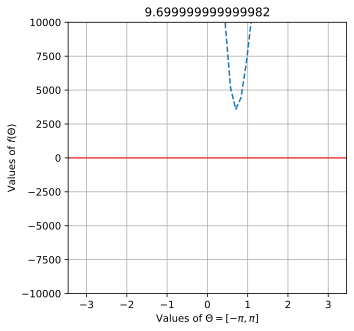

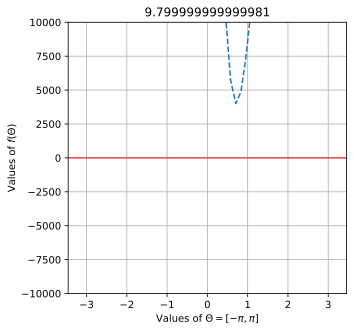

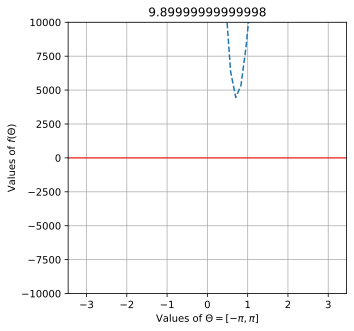

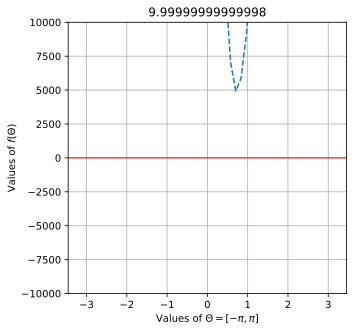

In [ ]:
k=0
while (k <= 10):
    p2 = k

    xval = np.linspace(-math.pi, math.pi, 50)
    yval = [f(i, L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3)[2] for i in xval]

    plt.figure(figsize=(5,5))
    plt.grid()
    plt.plot(xval, yval, '--')
    plt.axhline(0,color='red', lw=1)
    plt.title(k)
    plt.xlabel('Values of $\Theta = [-\pi, \pi]$')
    plt.ylabel('Values of $f(\Theta)$')
    plt.ylim(-1 * 10**4,1 * 10**4)
    plt.show()
    k+=0.1

The intervals of values in $p_2$ for each number of roots/poses is:
$$0: [0.0,3.7]$$ $$2: [3.8,4.8]$$ $$4: [4.9,6.9]$$ $$6: [6.9]$$ $$4: [7.0,7.8]$$ $$2: [7.9,9.2]$$ $$0: [9.3,\infty]$$

## V. References and Helpful Links

We give our references and any helpful links to understand this entire process.

Bisection method solver: https://www.geeksforgeeks.org/program-for-bisection-method/

Differentiation for Newton method solver: https://en.m.wikipedia.org/wiki/Numerical_differentiation

Matplotlib (General): It covers many aspects like plotting, labeling of axis, scientific vs default designs etc.
https://www.youtube.com/watch?v=cTJBJH8hacc&list=PLkdGijFCNuVm4IfZlsZPEt4fPJHfl-0g5&index=3

Matplotlib (arrows props): Used in part (b) to highlight roots in the plot
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html

NumPy: calculating pi, trigonometric functions:
https://www.youtube.com/watch?v=DcfYgePyedM&list=PLkdGijFCNuVm4IfZlsZPEt4fPJHfl-0g5&index=1

SciPy: calculating the derivative used in Newton-Raphson method:
https://www.youtube.com/watch?v=jmX4FOUEfgU&list=PLkdGijFCNuVm4IfZlsZPEt4fPJHfl-0g5&index=2

Convergence of bisection and Newton-Raphson method: Online lecture series by Prof. Niket S Kaisare, Week 4 and Week 5 lectures
https://nptel.ac.in/courses/127106019

Tables in Jupyter Notebook: Used in Part G:
https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter

Markdown in Jupyter Notebook: To write mathematical symbols in cells:
https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook

Using of for loops and while loop to create simulations and sequence of iterations:
https://github.com/AlphaWaveData/Jupyter-Notebooks/blob/master/Learn%20Python%20Loops.ipynb

Writing functions and functions under a function:
https://geo-python.github.io/site/develop/notebooks/L4/functions.html

https://notebook.community/evanmiltenburg/python-for-text-analysis/Chapters/Chapter%2011%20-%20Functions%20and%20scope

General information on the Stewart platform: https://en.wikipedia.org/wiki/Stewart_platform

Basics on roots of a function: https://en.wikipedia.org/wiki/Zero_of_a_function

General information on root-finding algorithms: https://en.wikipedia.org/wiki/Root-finding_algorithms

Understanding the bisection method for finding roots: https://www.youtube.com/watch?v=mzQFGOvH-mk, https://en.wikipedia.org/wiki/Bisection_method

Understanding the Newton-Raphson method for finding roots: https://www.youtube.com/watch?v=cf_NK7NlWrs, https://en.wikipedia.org/wiki/Newton%27s_method

What is forward kinematics: https://en.wikipedia.org/wiki/Forward_kinematics